## CSI Futures Data

#### CSI500 : http://www.csindex.com.cn/en/indices/index-detail/000905
#### 價差 : http://a0.pise.pw/KZ3PX

In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
dir_data = 'C:\\Users\\user\\Desktop\\MultiChart\\中證500股指期貨'
Data_Path = os.path.join(dir_data, 'CFFEX.IC HOT.txt')
CSI500 = pd.read_csv(Data_Path, engine='python')
CSI500.dropna(how='any',inplace=True)
CSI500.Date = pd.to_datetime(CSI500.Date)
CSI500['Date_Time'] = pd.to_datetime(CSI500['Date'].map(lambda x: str(x)) + ' ' + CSI500['Time'])
# Create Year & month & Return
CSI500['Year'] = CSI500['Date'].map(lambda x: x.year)
CSI500['Month'] = CSI500['Date'].map(lambda x: x.month)
CSI500['Week_day'] = CSI500['Date'].map(lambda x: x.weekday() + 1)
CSI500['Range'] = CSI500['High'] - CSI500['Low']
CSI500['Diff'] = CSI500['Close'] - CSI500['Open']
CSI500['Rotate'] = abs(CSI500['Diff']) / CSI500['Range']
CSI500['Up_down'] = CSI500['Diff'].map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
CSI500['Return'] = ((CSI500['Close'] - CSI500['Open']) / CSI500['Open'])*100
CSI500['P_Return'] = ((CSI500['High'] - CSI500['Low']) / CSI500['Low'])*100
# Sort CSI500 by Date
CSI500 = CSI500.sort_values(by = ['Date_Time'])
Year_sorted = np.sort(CSI500.Year.unique())
CSI500.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Date_Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return
0,2015-04-17,09:14:00,7722.0,7722.0,7722.0,7722.0,28,2015-04-17 09:14:00,2015,4,5,0.0,0.0,NaN,0,0.000000,0.000000
1,2015-04-17,09:15:00,7712.0,7727.6,7708.4,7708.4,608,2015-04-17 09:15:00,2015,4,5,19.2,-3.6,0.187500,-1,-0.046680,0.249079
2,2015-04-17,09:16:00,7722.0,7727.6,7708.4,7708.4,636,2015-04-17 09:16:00,2015,4,5,19.2,-13.6,0.708333,-1,-0.176120,0.249079
3,2015-04-17,09:17:00,7709.4,7709.4,7700.4,7700.4,466,2015-04-17 09:17:00,2015,4,5,9.0,-9.0,1.000000,-1,-0.116741,0.116877
4,2015-04-17,09:18:00,7700.0,7704.6,7699.2,7699.4,370,2015-04-17 09:18:00,2015,4,5,5.4,-0.6,0.111111,-1,-0.007792,0.070137


In [3]:
# Split time
time = CSI500['Time'].str.split(':', 2, expand = True)
CSI500['Hour'] = time[0].astype(int)
CSI500['Min'] = time[1].astype(int)
CSI500.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Date_Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return,Hour,Min
0,2015-04-17,09:14:00,7722.0,7722.0,7722.0,7722.0,28,2015-04-17 09:14:00,2015,4,5,0.0,0.0,NaN,0,0.000000,0.000000,9,14
1,2015-04-17,09:15:00,7712.0,7727.6,7708.4,7708.4,608,2015-04-17 09:15:00,2015,4,5,19.2,-3.6,0.187500,-1,-0.046680,0.249079,9,15
2,2015-04-17,09:16:00,7722.0,7727.6,7708.4,7708.4,636,2015-04-17 09:16:00,2015,4,5,19.2,-13.6,0.708333,-1,-0.176120,0.249079,9,16
3,2015-04-17,09:17:00,7709.4,7709.4,7700.4,7700.4,466,2015-04-17 09:17:00,2015,4,5,9.0,-9.0,1.000000,-1,-0.116741,0.116877,9,17
4,2015-04-17,09:18:00,7700.0,7704.6,7699.2,7699.4,370,2015-04-17 09:18:00,2015,4,5,5.4,-0.6,0.111111,-1,-0.007792,0.070137,9,18


In [4]:
# Calculate consecutive ups and downs
# ref:https://codereview.stackexchange.com/questions/138550/count-consecutive-ones-in-a-binary-list
def Go_up_num(Series):
    positive_list = []
    longest = 0
    current = 0
    for i in Series:
        if i == 1:
            current += 1
        else:
            longest = max(longest, current)
            positive_list.append(longest)
            current = 0
    return positive_list

def Go_down_num(Series):
    negative_list = []
    longest = 0
    current = 0
    for i in Series:
        if i == -1:
            current += 1
        else:
            longest = max(longest, current)
            negative_list.append(longest)
            current = 0
    return negative_list

In [83]:
#Split data (Train/ Test)
start_date = datetime.strptime('2015-08-01', '%Y-%m-%d')
end_date = datetime.strptime('2018-08-01', '%Y-%m-%d')
msk = (CSI500['Date'] <= end_date) & (CSI500['Date'] >= start_date)
CSI500_train = CSI500.loc[msk]
CSI500_test = CSI500.loc[~msk]

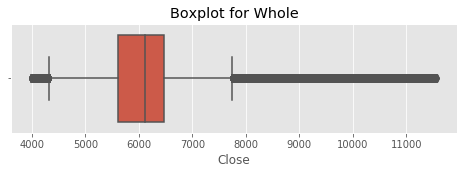

In [27]:
# Box plot for Whole
plt.figure(figsize=(8,2))    
sns.boxplot(CSI500.loc[:, 'Close'])
plt.title('Boxplot for Whole')
plt.show()

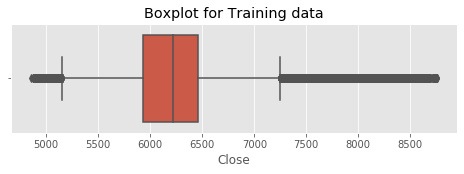

In [84]:
# Box plot for Training data
plt.figure(figsize=(8,2))    
sns.boxplot(CSI500_train.loc[:, 'Close'])
plt.title('Boxplot for Training data')
plt.show()

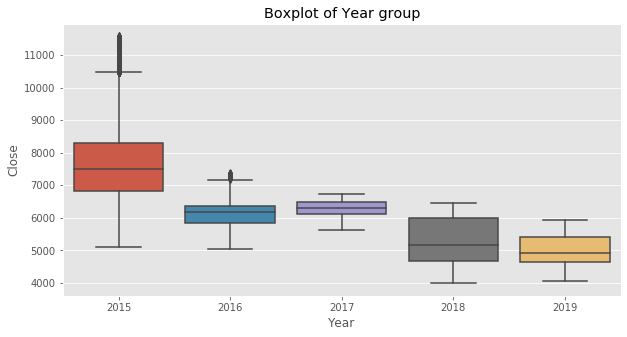

In [43]:
# Draw 6 Boxplots group by year
plt.figure(figsize=(10,5))
sns.boxplot(x='Year', y='Close', data=CSI500)
plt.title('Boxplot of Year group')
plt.show()

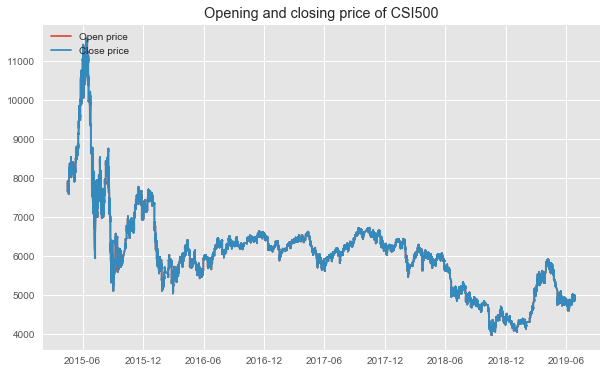

In [7]:
plt.figure(figsize=(10,6))
#plt.style.use('ggplot')
plt.title("Opening and closing price of CSI500")
plt.plot(CSI500['Date'], CSI500['Open'], label='Open price')
plt.plot(CSI500['Date'], CSI500['Close'], label='Close price')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink')

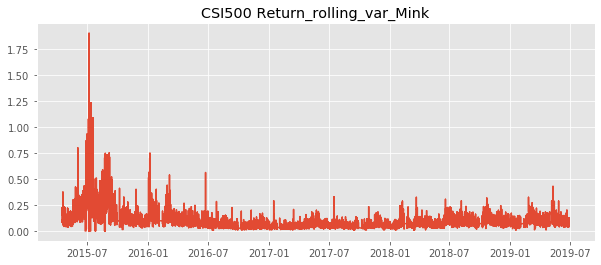

In [52]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(CSI500.Date,CSI500['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink(Training)')

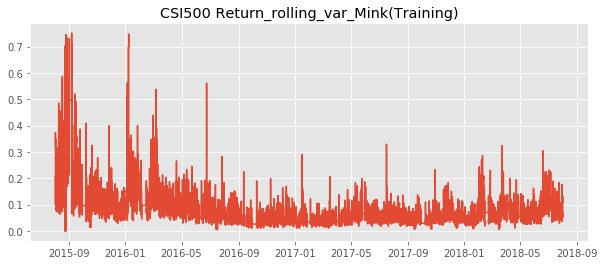

In [85]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(CSI500_train.Date,CSI500_train['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink(Training)')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During Month')

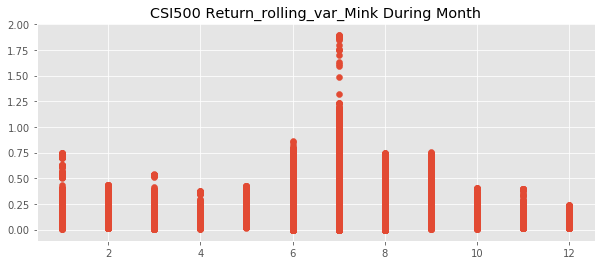

In [72]:
# Return (Month)
plt.figure(figsize = (10,4))
plt.scatter(CSI500.Month,CSI500['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During Month')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During Month (Training)')

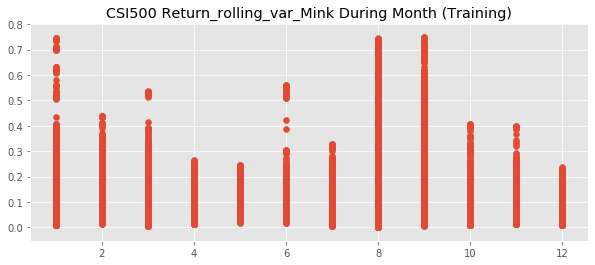

In [89]:
# Return (Month)
plt.figure(figsize = (10,4))
plt.scatter(CSI500_train.Month,CSI500_train['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During Month (Training)')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During Week_Day')

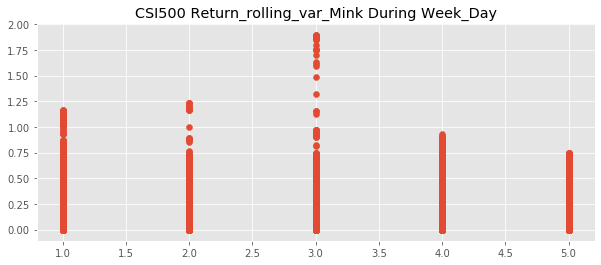

In [76]:
# Return (Week_Day)
plt.figure(figsize = (10,4))
plt.scatter(CSI500.Week_day,CSI500['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During Week_Day')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During Week_Day (Training)')

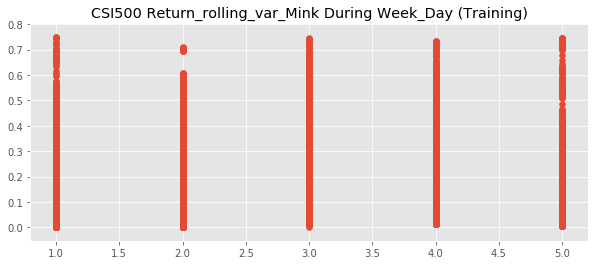

In [88]:
# Return (Week_Day)
plt.figure(figsize = (10,4))
plt.scatter(CSI500_train.Week_day,CSI500_train['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During Week_Day (Training)')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During day')

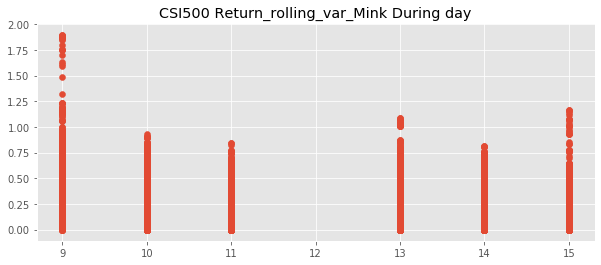

In [32]:
# Return (Hour)
plt.figure(figsize = (10,4))
plt.scatter(CSI500.Hour,CSI500['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During day')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During day(training)')

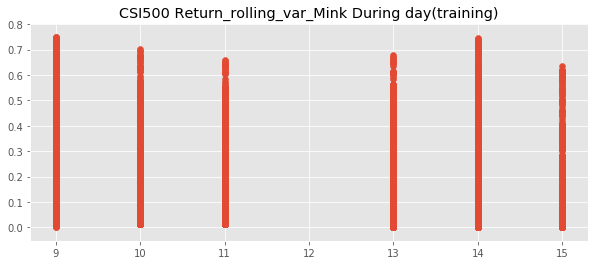

In [87]:
# Return (Hour)
plt.figure(figsize = (10,4))
plt.scatter(CSI500_train.Hour,CSI500_train['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During day(training)')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_Mink')

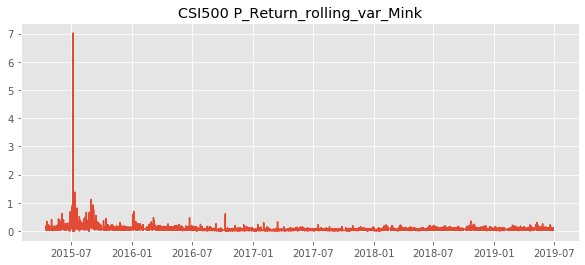

In [50]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(CSI500.Date,CSI500['P_Return'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_Mink')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_Mink(training)')

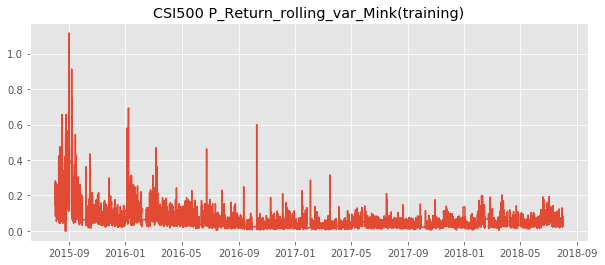

In [86]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(CSI500_train.Date,CSI500_train['P_Return'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_Mink(training)')

### 順逆勢分析

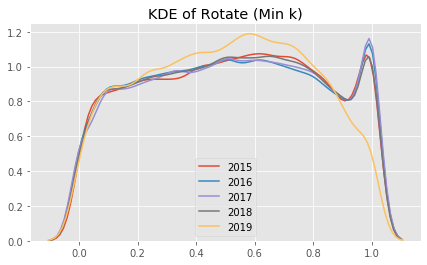

In [15]:
# Rotate
CSI500['Rotate'] = CSI500['Rotate'].replace([np.inf, -np.inf], np.nan)
CSI500['Rotate'].dropna(how='any',inplace=True)
# KDE of Rotate (Min k)
Year_sorted = np.sort(CSI500.Year.unique())
plt.figure(figsize=(7,4))
for i in range(len(Year_sorted)):
    sns.kdeplot(CSI500.loc[(CSI500['Year'] == Year_sorted[i]),'Rotate'],label = str(Year_sorted[i]),kernel='gau')
plt.title('KDE of Rotate (Min k)')
plt.legend()
plt.show()

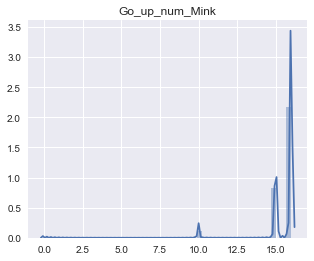

In [11]:
# 連續 K棒往上
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_up_num(CSI500['Up_down'])).set_title("Go_up_num_Mink")

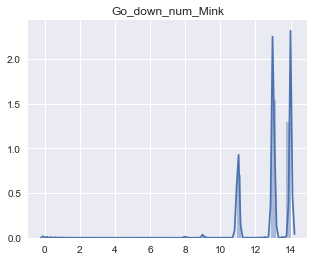

In [12]:
# 連續 K棒往下
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_down_num(CSI500['Up_down'])).set_title("Go_down_num_Mink")

### 5分k

In [92]:
# from min k to 5 min k (Training)
stock = CSI500_train.set_index('Date_Time')
period_type = '5T'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_5t'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_5t'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_5t'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_5t'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_5t'] = stock['TotalVolume'].resample(period_type,how='sum')
period_stock_data['range_5t'] = period_stock_data['high_5t'] - period_stock_data['low_5t']
period_stock_data['diff_5t'] = period_stock_data['close_5t'] - period_stock_data['open_5t']
period_stock_data['rotate_5t'] = abs(period_stock_data['range_5t']) / period_stock_data['diff_5t']
period_stock_data['up_down_5t'] = period_stock_data['diff_5t'].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_5t'] = ((period_stock_data['close_5t'] -  \
                                     period_stock_data['open_5t']) / period_stock_data['open_5t']) *100
period_stock_data['P_return_5t'] = ((period_stock_data['high_5t'] -  \
                                     period_stock_data['low_5t']) / period_stock_data['low_5t']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,...,close_5t,high_5t,low_5t,volume_5t,range_5t,diff_5t,rotate_5t,up_down_5t,return_5t,P_return_5t
0,2016-01-04 09:30:00,2016-01-04,09:34:00,7346.6,7349.4,7338.0,7338.0,66.0,2016.0,1.0,...,7338.0,7358.6,7321.2,501,37.4,-12.0,-3.116667,-1,-0.163265,0.510845
1,2016-01-04 09:35:00,2016-01-04,09:39:00,7334.2,7339.6,7327.6,7330.8,63.0,2016.0,1.0,...,7330.8,7364.8,7327.6,289,37.2,-13.2,-2.818182,-1,-0.179739,0.507670
2,2016-01-04 09:40:00,2016-01-04,09:44:00,7276.0,7288.8,7276.0,7287.4,58.0,2016.0,1.0,...,7287.4,7333.2,7257.8,434,75.4,-45.0,-1.675556,-1,-0.613714,1.038882
3,2016-01-04 09:45:00,2016-01-04,09:49:00,7254.0,7254.0,7239.0,7241.8,49.0,2016.0,1.0,...,7241.8,7287.2,7222.6,462,64.6,-43.2,-1.495370,-1,-0.592999,0.894415
4,2016-01-04 09:50:00,2016-01-04,09:54:00,7246.6,7258.6,7245.8,7258.6,47.0,2016.0,1.0,...,7258.6,7258.6,7231.8,218,26.8,16.8,1.595238,1,0.231987,0.370585


Text(0.5, 1.0, 'CSI500 Return_rolling_var_5Mink')

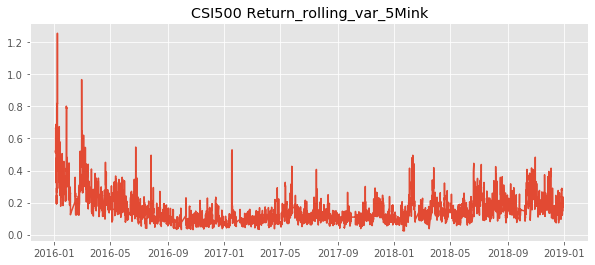

In [93]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['return_5t'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_5Mink')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_5Mink')

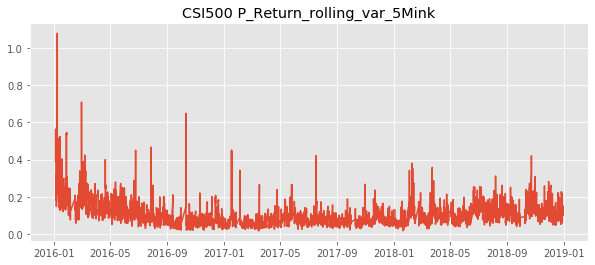

In [94]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['P_return_5t'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_5Mink')

### 15分k

In [95]:
# from min k to 15 min k (Training)
stock = CSI500_train.set_index('Date_Time')
period_type = '15T'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_%s'%(period_type)] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_%s'%(period_type)] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_%s'%(period_type)] = stock['High'].resample(period_type,how='max')
period_stock_data['low_%s'%(period_type)] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_%s'%(period_type)] = stock['TotalVolume'].resample(period_type,how='sum')
period_stock_data['range_%s'%(period_type)] = period_stock_data['high_%s'%(period_type)] - period_stock_data['low_%s'%(period_type)]
period_stock_data['diff_%s'%(period_type)] = period_stock_data['close_%s'%(period_type)] - period_stock_data['open_%s'%(period_type)]
period_stock_data['rotate_%s'%(period_type)] = abs(period_stock_data['range_%s'%(period_type)]) / period_stock_data['diff_%s'%(period_type)]
period_stock_data['up_down_%s'%(period_type)] = period_stock_data['diff_%s'%(period_type)].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_%s'%(period_type)] = ((period_stock_data['close_%s'%(period_type)] -  \
                                     period_stock_data['open_%s'%(period_type)]) / period_stock_data['open_%s'%(period_type)]) *100
period_stock_data['P_return_%s'%(period_type)] = ((period_stock_data['high_%s'%(period_type)] -  \
                                     period_stock_data['low_%s'%(period_type)]) / period_stock_data['low_%s'%(period_type)]) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,...,close_15T,high_15T,low_15T,volume_15T,range_15T,diff_15T,rotate_15T,up_down_15T,return_15T,P_return_15T
0,2016-01-04 09:30:00,2016-01-04,09:44:00,7276.0,7288.8,7276.0,7287.4,58.0,2016.0,1.0,...,7287.4,7364.8,7257.8,1224,107.0,-62.6,-1.709265,-1,-0.851701,1.474276
1,2016-01-04 09:45:00,2016-01-04,09:59:00,7256.0,7265.2,7253.8,7260.0,35.0,2016.0,1.0,...,7260.0,7287.2,7222.6,881,64.6,-25.0,-2.584000,-1,-0.343171,0.894415
2,2016-01-04 10:00:00,2016-01-04,10:14:00,7063.2,7063.2,7029.2,7029.2,88.0,2016.0,1.0,...,7029.2,7258.0,7029.2,1244,228.8,-228.8,-1.000000,-1,-3.152384,3.254993
3,2016-01-04 10:15:00,2016-01-04,10:29:00,7050.0,7058.0,7050.0,7057.8,34.0,2016.0,1.0,...,7057.8,7070.2,7029.2,677,41.0,28.6,1.433566,1,0.406874,0.583281
4,2016-01-04 10:30:00,2016-01-04,10:44:00,7067.0,7078.2,7066.2,7069.2,15.0,2016.0,1.0,...,7069.2,7117.0,7035.0,624,82.0,11.2,7.321429,1,0.158685,1.165601


Text(0.5, 1.0, 'CSI500 Return_rolling_var_15Mink')

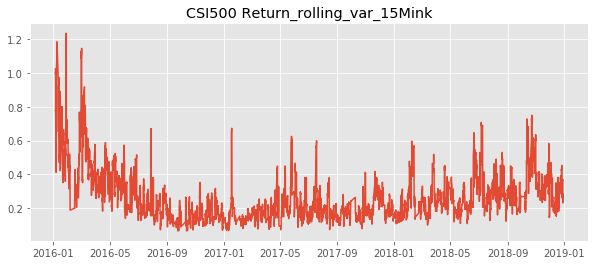

In [96]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['return_15T'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_15Mink')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_15Mink')

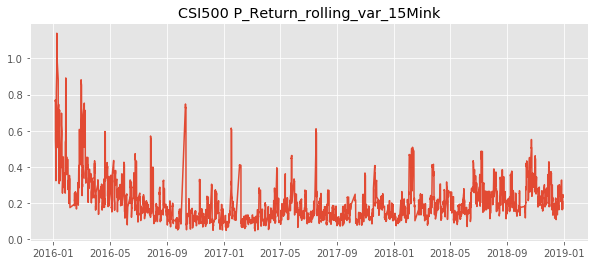

In [97]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['P_return_15T'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_15Mink')

### 30分k

In [98]:
# from min k to 30 min k (Training)
stock = CSI500_train.set_index('Date_Time')
period_type = '30T'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_%s'%(period_type)] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_%s'%(period_type)] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_%s'%(period_type)] = stock['High'].resample(period_type,how='max')
period_stock_data['low_%s'%(period_type)] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_%s'%(period_type)] = stock['TotalVolume'].resample(period_type,how='sum')
period_stock_data['range_%s'%(period_type)] = period_stock_data['high_%s'%(period_type)] - period_stock_data['low_%s'%(period_type)]
period_stock_data['diff_%s'%(period_type)] = period_stock_data['close_%s'%(period_type)] - period_stock_data['open_%s'%(period_type)]
period_stock_data['rotate_%s'%(period_type)] = abs(period_stock_data['range_%s'%(period_type)]) / period_stock_data['diff_%s'%(period_type)]
period_stock_data['up_down_%s'%(period_type)] = period_stock_data['diff_%s'%(period_type)].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_%s'%(period_type)] = ((period_stock_data['close_%s'%(period_type)] -  \
                                     period_stock_data['open_%s'%(period_type)]) / period_stock_data['open_%s'%(period_type)]) *100
period_stock_data['P_return_%s'%(period_type)] = ((period_stock_data['high_%s'%(period_type)] -  \
                                     period_stock_data['low_%s'%(period_type)]) / period_stock_data['low_%s'%(period_type)]) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,...,close_30T,high_30T,low_30T,volume_30T,range_30T,diff_30T,rotate_30T,up_down_30T,return_30T,P_return_30T
0,2016-01-04 09:30:00,2016-01-04,09:59:00,7256.0,7265.2,7253.8,7260.0,35.0,2016.0,1.0,...,7260.0,7364.8,7222.6,2105,142.2,-90.0,-1.580000,-1,-1.224490,1.968820
1,2016-01-04 10:00:00,2016-01-04,10:29:00,7050.0,7058.0,7050.0,7057.8,34.0,2016.0,1.0,...,7057.8,7258.0,7029.2,1921,228.8,-200.2,-1.142857,-1,-2.758336,3.254993
2,2016-01-04 10:30:00,2016-01-04,10:59:00,7077.4,7078.0,7071.2,7075.0,14.0,2016.0,1.0,...,7075.0,7117.0,7035.0,897,82.0,17.0,4.823529,1,0.240861,1.165601
3,2016-01-04 11:00:00,2016-01-04,11:29:00,7029.8,7030.0,7029.6,7029.6,12.0,2016.0,1.0,...,7029.6,7084.2,7029.2,742,55.0,-48.4,-1.136364,-1,-0.683809,0.782450
4,2016-01-04 11:30:00,2016-01-04,11:30:00,7029.6,7031.2,7029.2,7029.2,19.0,2016.0,1.0,...,7029.2,7031.2,7029.2,19,2.0,-0.4,-5.000000,-1,-0.005690,0.028453


Text(0.5, 1.0, 'CSI500 Return_rolling_var_30Mink')

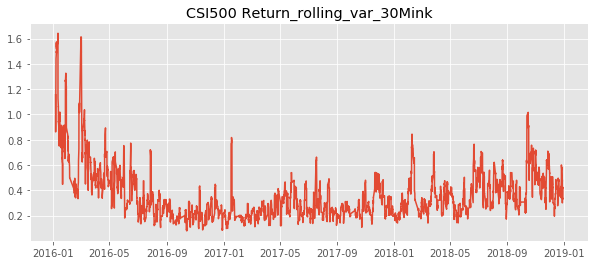

In [99]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['return_30T'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_30Mink')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_30Mink')

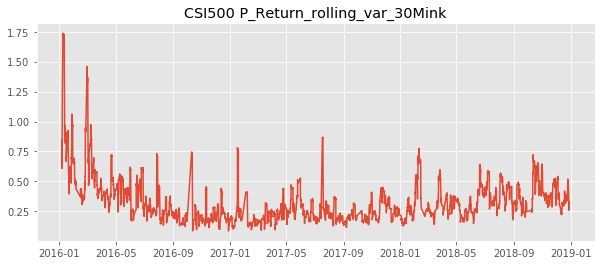

In [100]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['P_return_30T'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_30Mink')

### 60分k

In [103]:
# from min k to 60 min k (Training)
stock = CSI500_train.set_index('Date_Time')
period_type = '1H'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_%s'%(period_type)] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_%s'%(period_type)] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_%s'%(period_type)] = stock['High'].resample(period_type,how='max')
period_stock_data['low_%s'%(period_type)] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_%s'%(period_type)] = stock['TotalVolume'].resample(period_type,how='sum')
period_stock_data['range_%s'%(period_type)] = period_stock_data['high_%s'%(period_type)] - period_stock_data['low_%s'%(period_type)]
period_stock_data['diff_%s'%(period_type)] = period_stock_data['close_%s'%(period_type)] - period_stock_data['open_%s'%(period_type)]
period_stock_data['rotate_%s'%(period_type)] = abs(period_stock_data['range_%s'%(period_type)]) / period_stock_data['diff_%s'%(period_type)]
period_stock_data['up_down_%s'%(period_type)] = period_stock_data['diff_%s'%(period_type)].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_%s'%(period_type)] = ((period_stock_data['close_%s'%(period_type)] -  \
                                     period_stock_data['open_%s'%(period_type)]) / period_stock_data['open_%s'%(period_type)]) *100
period_stock_data['P_return_%s'%(period_type)] = ((period_stock_data['high_%s'%(period_type)] -  \
                                     period_stock_data['low_%s'%(period_type)]) / period_stock_data['low_%s'%(period_type)]) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,...,close_1H,high_1H,low_1H,volume_1H,range_1H,diff_1H,rotate_1H,up_down_1H,return_1H,P_return_1H
0,2016-01-04 09:00:00,2016-01-04,09:59:00,7256.0,7265.2,7253.8,7260.0,35.0,2016.0,1.0,...,7260.0,7364.8,7222.6,2133,142.2,-90.0,-1.580000,-1,-1.224490,1.968820
1,2016-01-04 10:00:00,2016-01-04,10:59:00,7077.4,7078.0,7071.2,7075.0,14.0,2016.0,1.0,...,7075.0,7258.0,7029.2,2818,228.8,-183.0,-1.250273,-1,-2.521356,3.254993
2,2016-01-04 11:00:00,2016-01-04,11:30:00,7029.6,7031.2,7029.2,7029.2,19.0,2016.0,1.0,...,7029.2,7084.2,7029.2,761,55.0,-48.8,-1.127049,-1,-0.689460,0.782450
3,2016-01-04 13:00:00,2016-01-04,13:34:00,6881.2,6881.2,6881.2,6881.2,130.0,2016.0,1.0,...,6881.2,7029.2,6881.2,481,148.0,-148.0,-1.000000,-1,-2.105503,2.150788
4,2016-01-05 09:00:00,2016-01-05,09:59:00,6808.6,6815.0,6802.8,6806.0,47.0,2016.0,1.0,...,6806.0,6817.0,6650.0,4055,167.0,156.0,1.070513,1,2.345865,2.511278


Text(0.5, 1.0, 'CSI500 Return_rolling_var_60Mink')

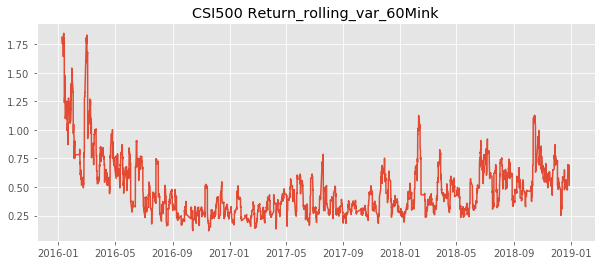

In [104]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['return_1H'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_60Mink')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_60Mink')

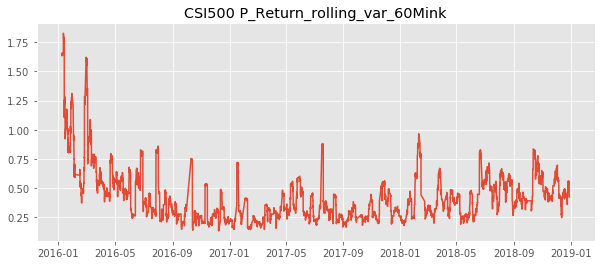

In [105]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['P_return_1H'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_60Mink')

### 日內波動度分析

In [8]:
# from min k to Day k (Training)
stock = CSI500.set_index('Date_Time')
period_type = '1D'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_%s'%(period_type)] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_%s'%(period_type)] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_%s'%(period_type)] = stock['High'].resample(period_type,how='max')
period_stock_data['low_%s'%(period_type)] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_%s'%(period_type)] = stock['TotalVolume'].resample(period_type,how='sum')
period_stock_data['range_%s'%(period_type)] = period_stock_data['high_%s'%(period_type)] - period_stock_data['low_%s'%(period_type)]
period_stock_data['diff_%s'%(period_type)] = period_stock_data['close_%s'%(period_type)] - period_stock_data['open_%s'%(period_type)]
period_stock_data['rotate_%s'%(period_type)] = abs(period_stock_data['range_%s'%(period_type)]) / period_stock_data['diff_%s'%(period_type)]
period_stock_data['up_down_%s'%(period_type)] = period_stock_data['diff_%s'%(period_type)].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_%s'%(period_type)] = ((period_stock_data['close_%s'%(period_type)] -  \
                                     period_stock_data['open_%s'%(period_type)]) / period_stock_data['open_%s'%(period_type)]) 
period_stock_data['P_return_%s'%(period_type)] = ((period_stock_data['high_%s'%(period_type)] -  \
                                     period_stock_data['low_%s'%(period_type)]) / period_stock_data['low_%s'%(period_type)]) 
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,...,close_1D,high_1D,low_1D,volume_1D,range_1D,diff_1D,rotate_1D,up_down_1D,return_1D,P_return_1D
0,2015-04-17,2015-04-17,15:15:00,7760.0,7760.0,7755.6,7758.2,426.0,2015.0,4.0,...,7758.2,7918.8,7631.2,115260,287.6,36.2,7.944751,1,0.004688,0.037687
1,2015-04-20,2015-04-20,15:15:00,7618.8,7624.8,7618.0,7622.2,480.0,2015.0,4.0,...,7622.2,7856.0,7583.0,100049,273.0,-137.8,-1.981132,-1,-0.017758,0.036002
2,2015-04-21,2015-04-21,15:15:00,8140.6,8147.0,8137.0,8140.4,1394.0,2015.0,4.0,...,8140.4,8147.0,7640.2,133906,506.8,490.2,1.033864,1,0.064077,0.066333
3,2015-04-22,2015-04-22,15:15:00,8188.0,8191.0,8185.8,8189.8,458.0,2015.0,4.0,...,8189.8,8237.2,8104.6,123495,132.6,31.8,4.169811,1,0.003898,0.016361
4,2015-04-23,2015-04-23,15:15:00,8268.0,8268.6,8261.2,8265.6,349.0,2015.0,4.0,...,8265.6,8378.0,8161.8,133570,216.2,72.6,2.977961,1,0.008861,0.026489


### 紅黑 k 報酬 (日內)

In [9]:
# Red k return
return_mask = period_stock_data['diff_1D'] > 0
period_stock_data.loc[return_mask,'return_1D'].describe()

count    525.000000
mean       0.012921
std        0.014898
min        0.000030
25%        0.003879
50%        0.008030
75%        0.016751
max        0.099990
Name: return_1D, dtype: float64

In [10]:
# Black k return
return_mask = period_stock_data['diff_1D'] < 0
period_stock_data.loc[return_mask,'return_1D'].describe()

count    499.000000
mean      -0.014013
std        0.018349
min       -0.116022
25%       -0.016552
50%       -0.007695
75%       -0.003001
max       -0.000035
Name: return_1D, dtype: float64

## CSI500 Spot Data 

In [8]:
# import data
dir_data = 'C:\\Users\\user\\Desktop\\MultiChart\\中證500股指期貨'
Data_Path = os.path.join(dir_data, 'SSE.txt')
SSE = pd.read_csv(Data_Path, engine='python')
SSE.dropna(how='any',inplace=True)
SSE.Date = pd.to_datetime(SSE.Date)
SSE['Date_Time'] = pd.to_datetime(SSE['Date'].map(lambda x: str(x)) + ' ' + SSE['Time'])
# Create Year & month & Return
SSE['Year'] = SSE['Date'].map(lambda x: x.year)
SSE['Month'] = SSE['Date'].map(lambda x: x.month)
SSE['Week_day'] = SSE['Date'].map(lambda x: x.weekday() + 1)
SSE['Range'] = SSE['High'] - SSE['Low']
SSE['Diff'] = SSE['Close'] - SSE['Open']
SSE['Rotate'] = abs(SSE['Diff']) / SSE['Range']
SSE['Up_down'] = SSE['Diff'].map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
SSE['Return'] = ((SSE['Close'] - SSE['Open']) / SSE['Open'])*100
SSE['P_Return'] = ((SSE['High'] - SSE['Low']) / SSE['Low'])*100
# Sort SSE by Date
SSE = SSE.sort_values(by = ['Date_Time'])
Year_sorted = np.sort(SSE.Year.unique())
SSE.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Date_Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return
0,2015-04-17,09:31:00,7979.35,8012.97,7979.35,8012.97,3583849,2015-04-17 09:31:00,2015,4,5,33.62,33.62,1.000000,1,0.421338,0.421338
1,2015-04-17,09:32:00,8014.90,8023.69,8014.90,8023.67,1808228,2015-04-17 09:32:00,2015,4,5,8.79,8.77,0.997725,1,0.109421,0.109671
2,2015-04-17,09:33:00,8023.75,8023.75,8014.48,8014.92,2022359,2015-04-17 09:33:00,2015,4,5,9.27,-8.83,0.952535,-1,-0.110048,0.115666
3,2015-04-17,09:34:00,8013.18,8013.18,8001.08,8001.08,1860753,2015-04-17 09:34:00,2015,4,5,12.10,-12.10,1.000000,-1,-0.151001,0.151230
4,2015-04-17,09:35:00,8001.17,8001.17,7996.26,7996.26,1495177,2015-04-17 09:35:00,2015,4,5,4.91,-4.91,1.000000,-1,-0.061366,0.061404


In [9]:
# Split time
time = SSE['Time'].str.split(':', 2, expand = True)
SSE['Hour'] = time[0].astype(int)
SSE['Min'] = time[1].astype(int)
SSE.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Date_Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return,Hour,Min
0,2015-04-17,09:31:00,7979.35,8012.97,7979.35,8012.97,3583849,2015-04-17 09:31:00,2015,4,5,33.62,33.62,1.000000,1,0.421338,0.421338,9,31
1,2015-04-17,09:32:00,8014.90,8023.69,8014.90,8023.67,1808228,2015-04-17 09:32:00,2015,4,5,8.79,8.77,0.997725,1,0.109421,0.109671,9,32
2,2015-04-17,09:33:00,8023.75,8023.75,8014.48,8014.92,2022359,2015-04-17 09:33:00,2015,4,5,9.27,-8.83,0.952535,-1,-0.110048,0.115666,9,33
3,2015-04-17,09:34:00,8013.18,8013.18,8001.08,8001.08,1860753,2015-04-17 09:34:00,2015,4,5,12.10,-12.10,1.000000,-1,-0.151001,0.151230,9,34
4,2015-04-17,09:35:00,8001.17,8001.17,7996.26,7996.26,1495177,2015-04-17 09:35:00,2015,4,5,4.91,-4.91,1.000000,-1,-0.061366,0.061404,9,35


In [10]:
#Split data (Train/ Test)
start_date = datetime.strptime('2016-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2018-12-31', '%Y-%m-%d')
msk = (SSE['Date'] <= end_date) & (SSE['Date'] >= start_date)
SSE_train = SSE.loc[msk]
SSE_test = SSE.loc[~msk]

### 期現貨資料合併

In [11]:
# Join CSI500 and SSE
SSE_mini = SSE.loc[:,['Date_Time', 'Close']]
CSI500_SSE = CSI500.join(SSE_mini.set_index('Date_Time'),lsuffix='_CSI500', rsuffix='_SSE', on='Date_Time')
CSI500_SSE.head()

,Date,Time,Open,High,Low,Close_CSI500,TotalVolume,Date_Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return,Hour,Min,Close_SSE
0,2015-04-17,09:14:00,7722.0,7722.0,7722.0,7722.0,28,2015-04-17 09:14:00,2015,4,5,0.0,0.0,NaN,0,0.000000,0.000000,9,14,NaN
1,2015-04-17,09:15:00,7712.0,7727.6,7708.4,7708.4,608,2015-04-17 09:15:00,2015,4,5,19.2,-3.6,0.187500,-1,-0.046680,0.249079,9,15,NaN
2,2015-04-17,09:16:00,7722.0,7727.6,7708.4,7708.4,636,2015-04-17 09:16:00,2015,4,5,19.2,-13.6,0.708333,-1,-0.176120,0.249079,9,16,NaN
3,2015-04-17,09:17:00,7709.4,7709.4,7700.4,7700.4,466,2015-04-17 09:17:00,2015,4,5,9.0,-9.0,1.000000,-1,-0.116741,0.116877,9,17,NaN
4,2015-04-17,09:18:00,7700.0,7704.6,7699.2,7699.4,370,2015-04-17 09:18:00,2015,4,5,5.4,-0.6,0.111111,-1,-0.007792,0.070137,9,18,NaN


### 價差分析

In [12]:
# Price_Difference
def Price_Difference(s1, s2):
    pd = []
    for i, j in zip(s1, s2):
        if np.isnan(i) | np.isnan(j):
            pd.append(np.nan)
        else:
            pd.append(i - j)
    return pd
CSI500_SSE['Price_Difference'] = Price_Difference(CSI500_SSE['Close_CSI500'],CSI500_SSE['Close_SSE'])

In [13]:
CSI500_SSE.loc[CSI500_SSE['Price_Difference'] > 0,'Price_Difference'].describe()

count    25471.000000
mean        23.058546
std         60.564933
min          0.010000
25%          3.010000
50%          6.680000
75%         12.740000
max        564.620000
Name: Price_Difference, dtype: float64

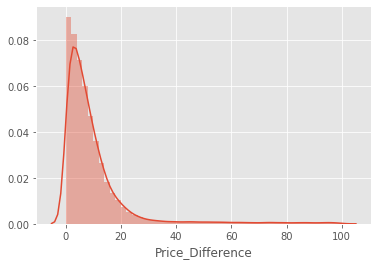

In [30]:
import seaborn as sns
sns.distplot(CSI500_SSE.loc[(CSI500_SSE['Price_Difference'] > 0) \
                            & (CSI500_SSE['Price_Difference'] < 100),'Price_Difference'])

In [13]:
CSI500_SSE.loc[CSI500_SSE['Price_Difference'] < 0,'Price_Difference'].describe()

count    217854.000000
mean        -79.912086
std         100.807606
min        -889.950000
25%         -95.470000
50%         -42.280000
75%         -20.410000
max          -0.010000
Name: Price_Difference, dtype: float64

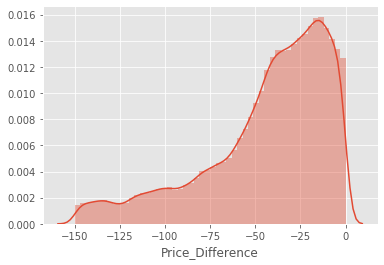

In [32]:
sns.distplot(CSI500_SSE.loc[(CSI500_SSE['Price_Difference'] < 0) \
                            & (CSI500_SSE['Price_Difference'] > -150),'Price_Difference'])

## Random Forest Return Threshold Prediction Model  

### 計算未來幾根k報酬率

In [14]:
# Future l k return
def future_return(s1, l):
    list1 = []
    for idx, val in enumerate(s1):
        if (idx + l) <= (len(s1) - 1):
            list1.append((s1[idx + l] - s1[idx]) / s1[idx])
        else:
            list1.append(0)
    return list1

### 5分k基本特徵值

In [15]:
# from min k to 5 min k 
stock = CSI500_SSE.set_index('Date_Time')
period_type = '5T'
period_stock_data = stock.resample(period_type,how='last')

# Original variables
period_stock_data['open_%s'%(period_type)] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_%s'%(period_type)] = stock['Close_CSI500'].resample(period_type,how='last')
period_stock_data['high_%s'%(period_type)] = stock['High'].resample(period_type,how='max')
period_stock_data['low_%s'%(period_type)] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_%s'%(period_type)] = stock['TotalVolume'].resample(period_type,how='sum')

# derivitive vairables
period_stock_data['range_%s'%(period_type)] = \
period_stock_data['high_%s'%(period_type)] - period_stock_data['low_%s'%(period_type)]
period_stock_data['diff_%s'%(period_type)] = \
period_stock_data['close_%s'%(period_type)] - period_stock_data['open_%s'%(period_type)]
period_stock_data['rotate_%s'%(period_type)] = \
abs(period_stock_data['range_%s'%(period_type)]) / period_stock_data['diff_%s'%(period_type)]

# Price_Difference(Future & Spot)
period_stock_data['price_dif_%s'%(period_type)] = stock['Price_Difference'].resample(period_type,how='sum')

# Returns
period_stock_data['return_%s'%(period_type)] = \
((period_stock_data['close_%s'%(period_type)] -  period_stock_data['open_%s'%(period_type)])\
 / period_stock_data['open_%s'%(period_type)]) 
period_stock_data['P_return_%s'%(period_type)] = \
((period_stock_data['high_%s'%(period_type)] - period_stock_data['low_%s'%(period_type)]) \
 / period_stock_data['low_%s'%(period_type)]) 

period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)

# Handeling fee ratio
period_stock_data['handeling_fee_ratio'] = 1000 / (period_stock_data['Close_CSI500'] * 200)

# Future_return (In 1 day, 52 k )
period_stock_data['future_Return_10'] = future_return(period_stock_data['Close_CSI500'], 10)
period_stock_data['future_Return_20'] = future_return(period_stock_data['Close_CSI500'], 20)
period_stock_data['future_Return_30'] = future_return(period_stock_data['Close_CSI500'], 30)
period_stock_data['future_Return_35'] = future_return(period_stock_data['Close_CSI500'], 35)
period_stock_data['future_Return_40'] = future_return(period_stock_data['Close_CSI500'], 40)
period_stock_data['future_Return_45'] = future_return(period_stock_data['Close_CSI500'], 45)
period_stock_data['future_Return_50'] = future_return(period_stock_data['Close_CSI500'], 50)

# Moving Average
period_stock_data['MA_10'] = period_stock_data['close_5T'].rolling(window=10).mean()
period_stock_data['MA_10'] = period_stock_data['MA_10'].fillna(0)
period_stock_data['MA_20'] = period_stock_data['close_5T'].rolling(window=20).mean()
period_stock_data['MA_20'] = period_stock_data['MA_20'].fillna(0)
period_stock_data['MA_30'] = period_stock_data['close_5T'].rolling(window=30).mean()
period_stock_data['MA_30'] = period_stock_data['MA_30'].fillna(0)
period_stock_data['MA_40'] = period_stock_data['close_5T'].rolling(window=40).mean()
period_stock_data['MA_40'] = period_stock_data['MA_40'].fillna(0)
period_stock_data['MA_50'] = period_stock_data['close_5T'].rolling(window=50).mean()
period_stock_data['MA_50'] = period_stock_data['MA_50'].fillna(0)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close_CSI500,TotalVolume,Year,Month,...,future_Return_30,future_Return_35,future_Return_40,future_Return_45,future_Return_50,MA_10,MA_20,MA_30,MA_40,MA_50
0,2015-04-17 09:30:00,2015-04-17,09:34:00,7675.6,7694.8,7672.8,7694.8,461.0,2015.0,4.0,...,0.014009,0.015647,0.015777,0.020014,0.001014,0.0,0.0,0.0,0.0,0.0
1,2015-04-17 09:35:00,2015-04-17,09:39:00,7762.8,7779.6,7752.0,7752.0,800.0,2015.0,4.0,...,0.005831,0.008101,0.014577,0.001419,-0.003354,0.0,0.0,0.0,0.0,0.0
2,2015-04-17 09:40:00,2015-04-17,09:44:00,7730.4,7749.0,7730.2,7740.0,523.0,2015.0,4.0,...,0.006718,0.012145,0.015452,0.001550,0.000103,0.0,0.0,0.0,0.0,0.0
3,2015-04-17 09:45:00,2015-04-17,09:49:00,7751.2,7780.4,7747.8,7774.6,753.0,2015.0,4.0,...,0.000051,0.005608,0.010058,-0.002804,-0.000592,0.0,0.0,0.0,0.0,0.0
4,2015-04-17 09:50:00,2015-04-17,09:54:00,7850.0,7859.0,7840.0,7850.4,742.0,2015.0,4.0,...,-0.009375,-0.004764,-0.001605,-0.008203,-0.016254,0.0,0.0,0.0,0.0,0.0


### 手續費/契約價值占比

In [16]:
period_stock_data['handeling_fee_ratio'].describe()

count    50663.000000
mean         0.000845
std          0.000147
min          0.000432
25%          0.000775
50%          0.000819
75%          0.000897
max          0.001255
Name: handeling_fee_ratio, dtype: float64

### 衍生變數處理

In [17]:
# RSI
def cal_U(num):
    if num >= 0:
        return num
    else:
        return 0
def cal_D(num):
    num = -num
    return cal_U(num)
 
period_stock_data['U'] = period_stock_data['diff_5T'].apply(cal_U)
period_stock_data['D'] = period_stock_data['diff_5T'].apply(cal_D)
period_stock_data['ema_U'] = period_stock_data['U'].ewm(span=14).mean()
period_stock_data['ema_D'] = period_stock_data['D'].ewm(span=14).mean()
period_stock_data['RS'] = period_stock_data['ema_U'].div(period_stock_data['ema_D'])
period_stock_data['RSI'] = period_stock_data['RS'].apply(lambda rs:rs/(1+rs) * 100)
period_stock_data['RSI'] = period_stock_data['RSI'].fillna(0)

# Red or Black
period_stock_data['RB_k'] = period_stock_data['diff_5T'].map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Return over Q2 (10%)
period_stock_data['Over_Q2'] = period_stock_data['return_5T'].map(lambda x: 1 if abs(x) > 0.10 else 0)

# Future Return cover handling fee (14%)
period_stock_data['future_Return_10_cov'] = period_stock_data['future_Return_10'].map(lambda x: 1 if abs(x) > 0.014 else 0)
period_stock_data['future_Return_20_cov'] = period_stock_data['future_Return_20'].map(lambda x: 1 if abs(x) > 0.014 else 0)
period_stock_data['future_Return_30_cov'] = period_stock_data['future_Return_30'].map(lambda x: 1 if abs(x) > 0.014 else 0)
period_stock_data['future_Return_35_cov'] = period_stock_data['future_Return_35'].map(lambda x: 1 if abs(x) > 0.014 else 0)
period_stock_data['future_Return_40_cov'] = period_stock_data['future_Return_40'].map(lambda x: 1 if abs(x) > 0.014 else 0)
period_stock_data['future_Return_45_cov'] = period_stock_data['future_Return_45'].map(lambda x: 1 if abs(x) > 0.014 else 0)
period_stock_data['future_Return_50_cov'] = period_stock_data['future_Return_50'].map(lambda x: 1 if abs(x) > 0.014 else 0)

In [18]:
# Dummy variables
period_stock_data = \
period_stock_data.reset_index().merge(pd.get_dummies(period_stock_data['Week_day'],prefix='Week_day',drop_first=True).\
                                      reset_index())
period_stock_data = \
period_stock_data.merge(pd.get_dummies(period_stock_data['Month'],prefix='Month',drop_first=True).reset_index())
period_stock_data = \
period_stock_data.merge(pd.get_dummies(period_stock_data['Year'],prefix='Year',drop_first=True).reset_index())

# y 變數
period_stock_data['future_y1'] = period_stock_data['future_Return_10_cov'] 
period_stock_data['future_y2'] = period_stock_data['future_Return_20_cov'] 
period_stock_data['future_y3'] = period_stock_data['future_Return_30_cov'] 
period_stock_data['future_y3_1'] = period_stock_data['future_Return_35_cov'] 
period_stock_data['future_y4'] = period_stock_data['future_Return_40_cov'] 
period_stock_data['future_y4_1'] = period_stock_data['future_Return_45_cov'] 
period_stock_data['future_y5'] = period_stock_data['future_Return_50_cov'] 

### 訓練/測試資料切分

In [145]:
#Split data (Train/ Test)
start_date = datetime.strptime('2015-07-01', '%Y-%m-%d')
end_date = datetime.strptime('2017-07-01', '%Y-%m-%d')
msk = (period_stock_data['Date'] <= end_date) & (period_stock_data['Date'] >= start_date)
period_stock_train = period_stock_data.loc[~msk]
period_stock_test = period_stock_data.loc[msk]

In [41]:
# All column
period_stock_train.columns.values

array(['index', 'Date_Time', 'Date', 'Time', 'Open', 'High', 'Low',
       'Close_CSI500', 'TotalVolume', 'Year', 'Month', 'Week_day',
       'Range', 'Diff', 'Rotate', 'Up_down', 'Return', 'P_Return', 'Hour',
       'Min', 'Close_SSE', 'Price_Difference', 'open_5T', 'close_5T',
       'high_5T', 'low_5T', 'volume_5T', 'range_5T', 'diff_5T',
       'rotate_5T', 'price_dif_5T', 'return_5T', 'P_return_5T',
       'handeling_fee_ratio', 'future_Return_10', 'future_Return_20',
       'future_Return_30', 'future_Return_35', 'future_Return_40',
       'future_Return_45', 'future_Return_50', 'MA_10', 'MA_20', 'MA_30',
       'MA_40', 'MA_50', 'U', 'D', 'ema_U', 'ema_D', 'RS', 'RSI', 'RB_k',
       'Over_Q2', 'future_Return_10_cov', 'future_Return_20_cov',
       'future_Return_30_cov', 'future_Return_35_cov',
       'future_Return_40_cov', 'future_Return_45_cov',
       'future_Return_50_cov', 'Week_day_2.0', 'Week_day_3.0',
       'Week_day_4.0', 'Week_day_5.0', 'Month_2.0', 'Month_3.0',
   

In [146]:
# X y 切分
#idx = []
#for i in list(range(21,29)) + list(range(30,33)) + list(range(37,39)):
    #idx.append(i)
idx_c = ['Year_2016.0', 'Year_2017.0', 'Year_2018.0','Year_2019.0',
         'Month_2.0','Month_3.0', 'Month_4.0', 'Month_5.0', 'Month_6.0', 'Month_7.0',
         'Month_8.0', 'Month_9.0', 'Month_10.0', 'Month_11.0', 'Month_12.0',
         'Week_day_2.0', 'Week_day_3.0', 'Week_day_4.0', 'Week_day_5.0',
         'open_5T', 'close_5T', 'high_5T','low_5T', 'volume_5T',
         'price_dif_5T', 'diff_5T', 'range_5T','return_5T',
         'RB_k','Over_Q2', 'MA_10','MA_20','MA_30','MA_40','MA_50','RSI']
# idx_c = ['open_5T', 'close_5T', 'high_5T','low_5T', 'volume_5T']
X_train = period_stock_train.loc[:, idx_c].values
y_train_1 = period_stock_train.loc[:, 'future_y1'].values
y_train_2 = period_stock_train.loc[:, 'future_y2'].values
y_train_3 = period_stock_train.loc[:, 'future_y3'].values
y_train_3_1 = period_stock_train.loc[:, 'future_y3_1'].values
y_train_4 = period_stock_train.loc[:, 'future_y4'].values
y_train_4_1 = period_stock_train.loc[:, 'future_y4_1'].values
y_train_5 = period_stock_train.loc[:, 'future_y5'].values

X_test = period_stock_test.loc[:, idx_c].values
y_test_1 = period_stock_test.loc[:, 'future_y1'].values
y_test_2 = period_stock_test.loc[:, 'future_y2'].values
y_test_3 = period_stock_test.loc[:, 'future_y3'].values
y_test_3_1 = period_stock_test.loc[:, 'future_y3_1'].values
y_test_4 = period_stock_test.loc[:, 'future_y4'].values
y_test_4_1 = period_stock_test.loc[:, 'future_y4_1'].values
y_test_5 = period_stock_test.loc[:, 'future_y5'].values

X_full = period_stock_data.loc[:, idx_c].values

### 建模套用

In [147]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_full = sc.fit_transform(X_full)

In [148]:
# Fitting RandomForestClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=19, max_depth=15)

classifier.fit(X_train, y_train_1)
y_pred1 = classifier.predict(X_full)
y_pred1_1 = classifier.predict(X_test)

classifier.fit(X_train, y_train_2)
y_pred2 = classifier.predict(X_full)
y_pred2_1 = classifier.predict(X_test)

classifier.fit(X_train, y_train_3)
y_pred3 = classifier.predict(X_full)
y_pred3_1 = classifier.predict(X_test)

classifier.fit(X_train, y_train_3_1)
y_pred3_1_1 = classifier.predict(X_full)
y_pred3_1_2 = classifier.predict(X_test)

classifier.fit(X_train, y_train_4)
y_pred4 = classifier.predict(X_full)
y_pred4_1 = classifier.predict(X_test)

classifier.fit(X_train, y_train_4_1)
y_pred4_1_1 = classifier.predict(X_full)
y_pred4_1_2 = classifier.predict(X_test)

classifier.fit(X_train, y_train_5)
y_pred5 = classifier.predict(X_full)
y_pred5_1 = classifier.predict(X_test)

In [ ]:
# Acuuracy
from sklearn import datasets, metrics
acc1 = metrics.accuracy_score(y_test_1, y_pred1_1)
acc2 = metrics.accuracy_score(y_test_2, y_pred2_1)
acc3 = metrics.accuracy_score(y_test_3, y_pred3_1)
acc4 = metrics.accuracy_score(y_test_3_1, y_pred3_1_2)
acc5 = metrics.accuracy_score(y_test_4, y_pred4_1)
acc6 = metrics.accuracy_score(y_test_4_1, y_pred4_1_2)
acc7 = metrics.accuracy_score(y_test_5, y_pred5_1)
data = {'accuracy': [acc1, acc2, acc3, acc4, acc5, acc6, acc7]}
df_acc = pd.DataFrame(data, index=['10k', '20k', '30k', '35k', '40k', '45k', '50k'])

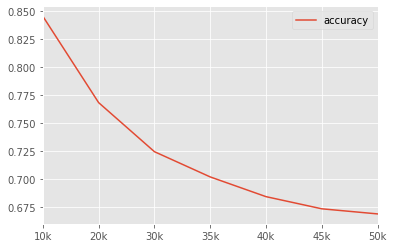

In [151]:
df_acc.plot.line()

### 資料輸出

In [ ]:
# Export the outcome
data1 = pd.DataFrame({'Date': period_stock_data['Date'], 'Time': period_stock_data['Time'],'10k': y_pred1})
data2 = pd.DataFrame({'Date': period_stock_data['Date'], 'Time': period_stock_data['Time'],'20k': y_pred2})
data3 = pd.DataFrame({'Date': period_stock_data['Date'], 'Time': period_stock_data['Time'],'30k': y_pred3})
data4 = pd.DataFrame({'Date': period_stock_data['Date'], 'Time': period_stock_data['Time'],'35k': y_pred3_1_1})
data5 = pd.DataFrame({'Date': period_stock_data['Date'], 'Time': period_stock_data['Time'],'40k': y_pred4})
data6 = pd.DataFrame({'Date': period_stock_data['Date'], 'Time': period_stock_data['Time'],'45k': y_pred4_1_1})
data7 = pd.DataFrame({'Date': period_stock_data['Date'], 'Time': period_stock_data['Time'],'50k': y_pred5})

data1.set_index('Date').to_csv( 'RF_1.csv')
data2.set_index('Date').to_csv( 'RF_2.csv')
data3.set_index('Date').to_csv( 'RF_3.csv')
data4.set_index('Date').to_csv( 'RF_4.csv')
data5.set_index('Date').to_csv( 'RF_5.csv')
data6.set_index('Date').to_csv( 'RF_6.csv')
data7.set_index('Date').to_csv( 'RF_7.csv')